# Sitemap Generator

Un Notebook Jupyter pour génerer une version graphique de notre sitemap.xml

## Test 1

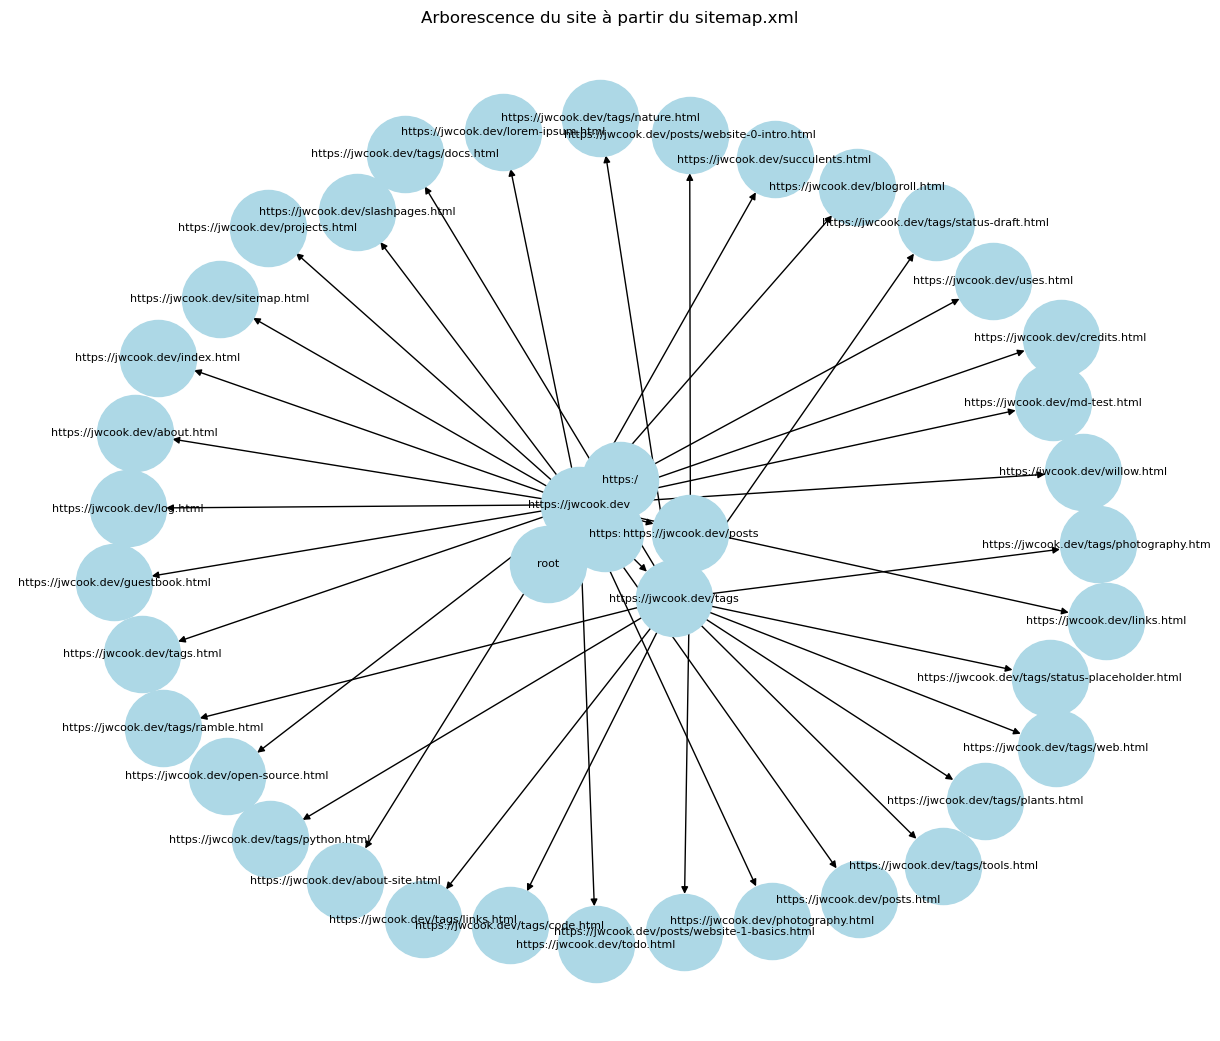

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from bs4 import BeautifulSoup
import requests

# URL de ton sitemap
sitemap_url = "https://jwcook.tilde.team/sitemap.xml"

response = requests.get(sitemap_url)
soup = BeautifulSoup(response.content, "xml")

urls = [loc.text for loc in soup.find_all("loc")]

G = nx.DiGraph()

for url in urls:
    parts = url.replace("https://ton-nom.github.io/ton-repo/", "").strip("/").split("/")
    for i in range(1, len(parts) + 1):
        parent = "/".join(parts[:i-1]) or "root"
        child = "/".join(parts[:i])
        G.add_edge(parent, child)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=8, arrows=True)
plt.title("Arborescence du site à partir du sitemap.xml")
plt.show()

## Test 2

In [ ]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from bs4 import BeautifulSoup

# Répertoire HTML local généré par Sphinx
html_dir = "_build/html"

G = nx.DiGraph()
path_labels = {}

def get_h1_from_file(filepath):
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            soup = BeautifulSoup(f, "html.parser")
            h1 = soup.find("h1")
            if h1 and h1.text.strip():
                return h1.text.strip()
            title = soup.find("title")
            return title.text.strip() if title else os.path.basename(filepath)
    except Exception as e:
        return os.path.basename(filepath)

# Parcours récursif des fichiers HTML
for root, dirs, files in os.walk(html_dir):
    for file in files:
        if file.endswith(".html"):
            full_path = os.path.join(root, file)
            rel_path = os.path.relpath(full_path, html_dir).replace("\\", "/")
            parts = rel_path.split("/")[:-1] + [file]  # chaque dossier + fichier

            parent = "root"
            for i in range(len(parts)):
                node_path = "/".join(parts[:i+1])
                if node_path not in path_labels:
                    local_file = os.path.join(html_dir, *parts[:i+1])
                    label = get_h1_from_file(local_file) if os.path.isfile(local_file) else parts[i]
                    path_labels[node_path] = label
                G.add_edge(parent, path_labels[node_path])
                parent = path_labels[node_path]

# Affichage du graphe
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=8, arrows=True)
plt.title("Arborescence du site (H1 extraits localement)", fontsize=14)
plt.show()